<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `C:\Users\elpid\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\elpid\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\elpid\.julia\environments\v1.8\Manifest.toml`


In [2]:
import SpecialFunctions
import Plots
import Distributions as di

In [3]:
#gaussian_pdf = (1/(sqrt(2π)σ)) * exp(-(x-μ)^2/(2σ^2))
#gaussian_cdf = (1/2) * [1 + erf((x - μ)/(σ*sqrt(2)))]
#gaussian_cdf_inv = μ + σ * sqrt(2) * erfinv(2u - 1)

In [11]:
using SpecialFunctions, Plots

function sample_gaussian(μ, σ, n)
    gauss_sample = zeros(n)
    for x in 1:n
        #generate n amount of unfiform random numbers (U~Unif(0,1))
        u = rand()
        #use inverse gaussian cdf for inverse transform (F^(-1)(x))
        gauss_sample[x] = μ + σ * sqrt(2) * erfinv(2u - 1)
    end
    return gauss_sample
end

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [12]:
μ = -1
σ = 2
gauss = sample_gaussian(μ,σ,10000)

10000-element Vector{Float64}:
  2.2833532500520284
  2.5376398665920346
 -1.5874734059603273
 -0.5071464431930738
  0.5714110299047452
 -2.473639318708151
 -2.2612744388315593
  2.199839396211693
 -0.1825981860035104
  1.5952702075036904
 -1.599285131165587
 -1.876509099078239
 -4.315376793344215
  ⋮
 -0.1990871478695153
 -1.9745302470076163
 -1.6728291829517905
 -3.234998687958972
 -3.813691018132181
 -0.8358135129986657
 -4.095539098879341
 -0.8135860100629407
 -3.9498910358065817
 -3.168923864335477
  1.285150346646931
 -0.9442491959037277

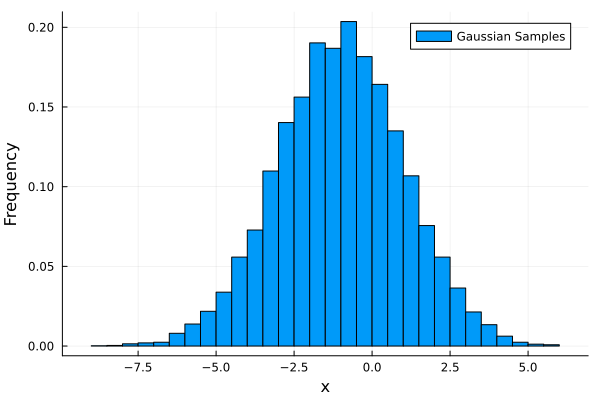

In [13]:
histogram(gauss, label = "Gaussian Samples", xlabel = "x", ylabel = "Frequency", normalize=true)

In [14]:
using Distributions
x = -8:0.001:6
gaussian_pdf = pdf.(Normal(μ,σ), x)

14001-element Vector{Float64}:
 0.0004363413475228801
 0.00043710555878045894
 0.00043787099901516186
 0.00043863766999606706
 0.0004394055734944224
 0.0004401747112836551
 0.00044094508513936836
 0.0004417166968393453
 0.0004424895481635528
 0.0004432636408941397
 0.0004440389768154412
 0.00044481555771398246
 0.0004455933853784757
 ⋮
 0.00044481555771398246
 0.0004440389768154412
 0.0004432636408941397
 0.0004424895481635528
 0.0004417166968393453
 0.00044094508513936836
 0.0004401747112836551
 0.0004394055734944224
 0.00043863766999606706
 0.00043787099901516186
 0.00043710555878045894
 0.0004363413475228801

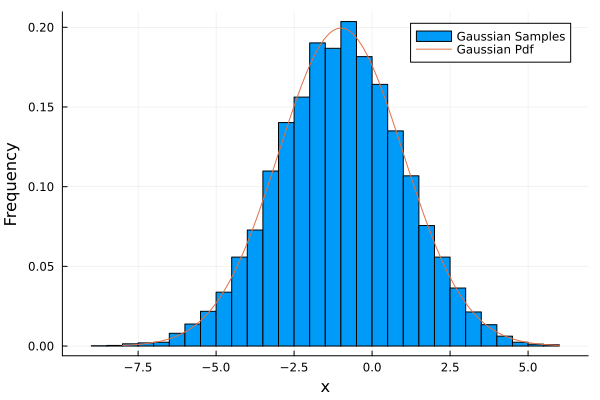

In [15]:
plot!(x,gaussian_pdf, label="Gaussian Pdf")